In [285]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
speed_deviation = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed Deviation')
distance_from_car = ctrl.Antecedent(np.arange(0, 50, 1), 'Distance from car')
throttle= ctrl.Consequent(np.arange(-100, 100, 1), 'Throttle')

# Auto-membership function population is possible with .automf(3, 5, or 7)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API

throttle['break'] = fuzz.trimf(throttle.universe, [-10000000, -80, -50])
throttle['off'] = fuzz.trimf(throttle.universe, [-10000000, -25, 0])
throttle['maintain'] = fuzz.trimf(throttle.universe, [-10, 0, 10])
throttle['high'] = fuzz.trimf(throttle.universe, [0, 25, 10000000])
throttle['higher'] = fuzz.trimf(throttle.universe, [50, 80, 10000000])

speed_deviation['too slow'] = fuzz.trimf(speed_deviation.universe, [-10000000, -13, -7])
speed_deviation['slow'] = fuzz.trimf(speed_deviation.universe, [-10000000, -10, 0])
speed_deviation['good'] = fuzz.trimf(speed_deviation.universe, [-2, 0, 2])
speed_deviation['fast'] = fuzz.trimf(speed_deviation.universe, [0, 10, 10000000])
speed_deviation['too fast'] = fuzz.trimf(speed_deviation.universe, [7, 13, 10000000])

distance_from_car['too close'] = fuzz.trimf(distance_from_car.universe, [-10000000, 0, 8])
distance_from_car['close'] = fuzz.trimf(distance_from_car.universe, [-10000000, 8, 20])
distance_from_car['okay'] = fuzz.trimf(distance_from_car.universe, [18, 22, 26])
distance_from_car['far'] = fuzz.trimf(distance_from_car.universe, [24, 38, 10000000])
distance_from_car['too far'] = fuzz.trimf(distance_from_car.universe, [38, 50, 10000000])


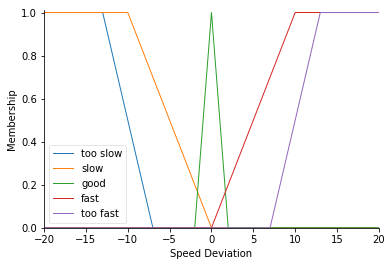

In [286]:
# You can see how these look with .view()
speed_deviation.view()

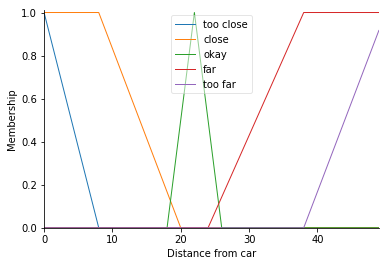

In [287]:
distance_from_car.view()

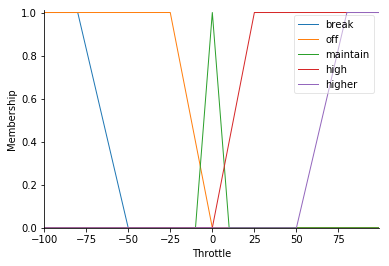

In [288]:
throttle.view()

In [289]:
rule1 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['too close'], throttle['break'])
rule2 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['close'], throttle['off'])
rule3 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['okay'], throttle['maintain'])
rule4 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['far'], throttle['high'])
rule5 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['too far'], throttle['higher'])

rule6 = ctrl.Rule(speed_deviation['slow'] & distance_from_car['too close'], throttle['break'])
rule7 = ctrl.Rule(speed_deviation['slow'] & distance_from_car['close'], throttle['off'])
rule8 = ctrl.Rule(speed_deviation['slow'] & distance_from_car['okay'], throttle['maintain'])
rule9 = ctrl.Rule(speed_deviation['slow'] & distance_from_car['far'], throttle['high'])
rule10 = ctrl.Rule(speed_deviation['slow'] & distance_from_car['too far'], throttle['higher'])

rule11 = ctrl.Rule(speed_deviation['good'] & distance_from_car['too close'], throttle['break'])
rule12 = ctrl.Rule(speed_deviation['good'] & distance_from_car['close'], throttle['off'])
rule13 = ctrl.Rule(speed_deviation['good'] & distance_from_car['okay'], throttle['maintain'])
rule14 = ctrl.Rule(speed_deviation['good'] & distance_from_car['far'], throttle['maintain'])
rule15 = ctrl.Rule(speed_deviation['good'] & distance_from_car['too far'], throttle['maintain'])

rule16 = ctrl.Rule(speed_deviation['fast'] & distance_from_car['too close'], throttle['break'])
rule17 = ctrl.Rule(speed_deviation['fast'] & distance_from_car['close'], throttle['break'])
rule18 = ctrl.Rule(speed_deviation['fast'] & distance_from_car['okay'], throttle['off'])
rule19 = ctrl.Rule(speed_deviation['fast'] & distance_from_car['far'], throttle['off'])
rule20 = ctrl.Rule(speed_deviation['fast'] & distance_from_car['too far'], throttle['off'])

rule21 = ctrl.Rule(speed_deviation['too fast'] & distance_from_car['too close'], throttle['break'])
rule22 = ctrl.Rule(speed_deviation['too fast'] & distance_from_car['close'], throttle['break'])
rule23 = ctrl.Rule(speed_deviation['too fast'] & distance_from_car['okay'], throttle['break'])
rule24 = ctrl.Rule(speed_deviation['too fast'] & distance_from_car['far'], throttle['off'])
rule25 = ctrl.Rule(speed_deviation['too fast'] & distance_from_car['too far'], throttle['off'])


In [296]:
throttle_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

In [297]:
throttling = ctrl.ControlSystemSimulation(throttle_ctrl)


In [300]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
throttling.input['Speed Deviation'] = 0
throttling.input['Distance from car'] = 1
# Crunch the numbers
############################################################################################

throttling.compute() 

-55.9523205288746


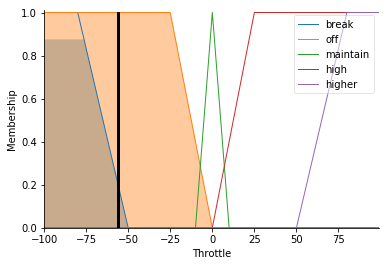

In [301]:
print(throttling.output['Throttle'])

throttle.view(sim=throttling)